In [1]:
import numpy as np
import random as r 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
from scipy import stats
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn import cross_validation

from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC

import sklearn.metrics as mt

C:\Users\Равиль\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
titanic_df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv") 

In [3]:
def insrt(name, test):
    arr = np.array(test[name])
    arr[np.isnan(arr)] = 0
    test[name] = arr

In [4]:
df  = pd.DataFrame(titanic_df, columns=titanic_df.keys())  
df_test = pd.DataFrame(test, columns=test.keys())  


insrt('Age', df_test)
insrt('Fare', df_test)
insrt('Age', df)
insrt('Fare', df)

df = df.drop(['SibSp', 'Parch', 'Fare','PassengerId','Ticket','Name', 'Cabin', 'Embarked'], axis=1)
df = df.dropna(subset = ['Pclass', 'Age', 'Sex','Survived'])

df_test = df_test.drop(['SibSp', 'Parch', 'Fare', 'PassengerId','Ticket','Name', 'Cabin', 'Embarked'], axis=1) 
df_test = df_test.dropna(subset = ['Pclass', 'Age', 'Sex'])

In [5]:
arr = np.array(df['Sex'])
arr[arr=='male'] = 1
arr[arr=='female'] = 0
df['Sex'] = arr 


arr = np.array(df_test['Sex'])
arr[arr=='male'] = 1
arr[arr=='female'] = 0
df_test['Sex'] = arr

In [6]:
surviv = pd.DataFrame(df.Survived)
train  = pd.DataFrame(df.drop(['Survived'], axis=1))

X_train, X_test, t_train, t_test = cross_validation.train_test_split(train, surviv , test_size=0.1) 

<IPython.core.display.Javascript object>


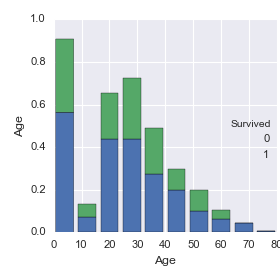

<IPython.core.display.Javascript object>


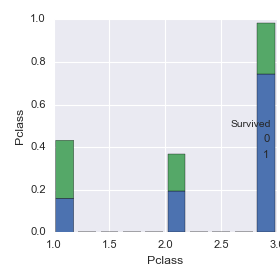

<IPython.core.display.Javascript object>


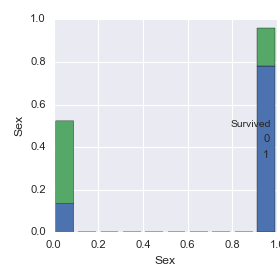

In [7]:
sns.pairplot(df, vars=["Age"], hue="Survived", size=3.5 )
sns.pairplot(df, vars=["Pclass"], hue="Survived", size=3.5 )
sns.pairplot(df, vars=["Sex"], hue="Survived", size=3.5 )

In [8]:
model_rfc = RandomForestClassifier(n_estimators = 70) #в параметре передаем кол-во деревьев 
model_lr = LogisticRegression(penalty='l1', tol=0.01) 
model_svc = SVC()                                 #по умолчанию kernek='rbf'
model_km = KMeans()

In [18]:
clf=LogisticRegression()
clf.fit(X_train,t_train)

y_train = clf.predict(X_train)
y_test = clf.predict(X_test)

prec=mt.precision_score(t_test, y_test)
recall=mt.recall_score(t_test, y_test)
f=2*recall*prec/(prec+recall)
print('test Logistic')
print ('Precision = %0.4f' %prec )
print ('Recall = %0.4f' %recall )
print ('Accuracy = %0.4f' % mt.accuracy_score(t_test, y_test))
print ('F-measure = %0.4f' %f )

prec=mt.precision_score(t_train, y_train)
recall=mt.recall_score(t_train, y_train)
f=2*recall*prec/(prec+recall)
print('train Logistic')
print ('Precision = %0.4f' %prec )
print ('Recall = %0.4f' %recall )
print ('Accuracy = %0.4f' % mt.accuracy_score(t_train, y_train))
print ('F-measure = %0.4f' %f )

test Logistic
Precision = 0.6667
Recall = 0.6316
Accuracy = 0.7111
F-measure = 0.6486
train Logistic
Precision = 0.7313
Recall = 0.7072
Accuracy = 0.7903
F-measure = 0.7191


C:\Users\Равиль\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
svm= SVC(kernel='rbf')
svm.fit(X_train,t_train)

y_train = svm.predict(X_train)
y_test = svm.predict(X_test)

prec=mt.precision_score(t_test, y_test)
recall=mt.recall_score(t_test, y_test)
f=2*recall*prec/(prec+recall)
print('test SVM')
print ('Precision = %0.4f' %prec )
print ('Recall = %0.4f' %recall )
print ('Accuracy = %0.4f' % mt.accuracy_score(t_test, y_test))
print ('F-measure = %0.4f' %f )

prec=mt.precision_score(t_train, y_train)
recall=mt.recall_score(t_train, y_train)
f=2*recall*prec/(prec+recall)
print('train SVM')
print ('Precision = %0.4f' %prec )
print ('Recall = %0.4f' %recall )
print ('Accuracy = %0.4f' % mt.accuracy_score(t_train, y_train))
print ('F-measure = %0.4f' %f )

test SVM
Precision = 0.7059
Recall = 0.6316
Accuracy = 0.7333
F-measure = 0.6667
train SVM
Precision = 0.8345
Recall = 0.7796
Accuracy = 0.8577
F-measure = 0.8061


C:\Users\Равиль\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
randomForest = RandomForestClassifier(n_estimators=100, random_state=0)
randomForest.fit(X_train,t_train)

y_train = randomForest.predict(X_train)
y_test = randomForest.predict(X_test)

prec=mt.precision_score(t_test, y_test)
recall=mt.recall_score(t_test, y_test)
f=2*recall*prec/(prec+recall)
print('test randomForest')
print ('Precision = %0.4f' %prec )
print ('Recall = %0.4f' %recall )
print ('Accuracy = %0.4f' % mt.accuracy_score(t_test, y_test))
print ('F-measure = %0.4f' %f )

prec=mt.precision_score(t_train, y_train)
recall=mt.recall_score(t_train, y_train)
f=2*recall*prec/(prec+recall)
print('train randomForest')
print ('Precision = %0.4f' %prec )
print ('Recall = %0.4f' %recall )
print ('Accuracy = %0.4f' % mt.accuracy_score(t_train, y_train))
print ('F-measure = %0.4f' %f )

test randomForest
Precision = 0.7742
Recall = 0.6316
Accuracy = 0.7667
F-measure = 0.6957
train randomForest
Precision = 0.8690
Recall = 0.8289
Accuracy = 0.8876
F-measure = 0.8485


C:\Users\Равиль\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


In [21]:
kMeans = KMeans(2)
kMeans.fit(X_train,t_train)

y_train = kMeans.predict(X_train)
y_test = kMeans.predict(X_test)

prec=mt.precision_score(t_test, y_test)
recall=mt.recall_score(t_test, y_test)
f=2*recall*prec/(prec+recall)
print('test kMeans')
print ('Precision = %0.4f' %prec )
print ('Recall = %0.4f' %recall )
print ('Accuracy = %0.4f' % mt.accuracy_score(t_test, y_test))
print ('F-measure = %0.4f' %f ) 

prec=mt.precision_score(t_train, y_train)
recall=mt.recall_score(t_train, y_train)
f=2*recall*prec/(prec+recall)
print('train kMeans')
print ('Precision = %0.4f' %prec )
print ('Recall = %0.4f' %recall )
print ('Accuracy = %0.4f' % mt.accuracy_score(t_train, y_train))
print ('F-measure = %0.4f' %f )

test kMeans
Precision = 0.3529
Recall = 0.3158
Accuracy = 0.4667
F-measure = 0.3333
train kMeans
Precision = 0.3660
Recall = 0.4178
Accuracy = 0.5044
F-measure = 0.3902


Random Forest показал лучшие результаты, поэтому будем работать с ним

In [22]:
result=randomForest.predict(df_test)
result =pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Survived": result
})

print(result)


     PassengerId  Survived
0            892         0
1            893         0
2            894         1
3            895         1
4            896         1
5            897         0
6            898         0
7            899         0
8            900         0
9            901         0
10           902         0
11           903         0
12           904         1
13           905         1
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         0
20           912         0
21           913         1
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         1
390         1282         1
391         1283         1
392         1284         1
3

In [30]:
result.to_csv('testEnd.csv', index=False)